In [1]:
import os
import shutil
import numpy as np
from angstrom import Molecule, Trajectory
from angstrom.visualize import render
from angstrom.visualize.blender import Blender
from IPython.display import Image
# from angstrom.cli.tools import rotation
from angstrom.geometry.quaternion import Quaternion

In [2]:
intersections_dir = "/Users/kbsezginel/kbs/git/lemongrove.github.io/assets/molecules/intersections"
xyz_file = os.path.join(intersections_dir, "Trigonal-Planar-n4-m4.xyz")
mol = Molecule(read=xyz_file)
x_align = [11, 48]
c1, c2 = (mol.coordinates[x] for x in x_align)
mol.align(c2 - c1, [1, 0, 0])
mol.rotate('x', np.pi / 18)
mol.center([0, 0, -10])
mol.write('trigonal-align.xyz')

In [3]:
def blender_traj():
    blend = Blender()
    blend.config["executable"] = '/Applications/Blender.app/Contents/MacOS/Blender'
    blend.config['camera']['type'] = 'PERSP'
    blend.config['camera']['zoom'] = 30
    # blend.config['save'] = 'octahedtal.blend'
    blend.config['pdb']['use_center'] = False
    blend.config['resolution'] = (800, 800)
    blend.config['img_file'] = 'trigonal'
    blend.config['vid_file'] = 'trigonal'
    blend.config['light'] = 5000
    return blend

In [11]:
from copy import deepcopy

In [20]:
def rotation(mol, n_frames, rot_angle, rot_axis, interpolation='linear', center=True, verbose=False):
    """
    Rotate molecule around an axis for given number of frames.
    """
    if interpolation == 'linear':
        angles = np.cumsum(np.full((n_frames,), np.deg2rad(rot_angle / n_frames)))
    elif interpolation == 'sine':
        a = np.deg2rad(rot_angle) / np.pi
        x = np.arange(-np.pi / 2, np.pi / 2, np.pi / n_frames)
        angles = a * np.pi / 2 * np.sin(x) + (np.pi / 2) * a
    n_atoms = len(mol.atoms)
    motion = np.zeros((n_frames + 1, n_atoms, 3))
    Q = Quaternion([0, 1, 1, 1])
    traj = Trajectory(molecule=mol)
    # angle = 0
    for a in angles:
        tmp_mol = deepcopy(mol)
        # angle = a - angle
        if verbose:
            print(f"Rotating {np.rad2deg(a):6.2f} degrees")
        tmp_mol.rotate(rot_axis, a, center=center)
        traj.append(tmp_mol)
#       motion[frame] = np.array([Q.rotation(coor, rot_axis, d_angle).np() for coor in mol.coordinates])
#       traj = Trajectory(atoms=np.tile(mol.atoms, n_frames).reshape((n_frames, n_atoms)),
#                         coordinates=motion)
    return traj

In [27]:
n_frames = 30
angle = 360
for drx in ['x', 'y', 'z']:
    mol = Molecule(read='trigonal-align.xyz')
    traj_sine = rotation(mol, n_frames, angle, drx, interpolation='sine', center=True, verbose=True)
    blend = blender_traj()
    print(f'rendering {drx}')
    render(traj_sine, renderer=blend)
    # Move images
    images = [f"{i}.png" for i in range(n_frames)]
    drx_dir = f'tri-{drx}'
    os.makedirs(drx_dir, exist_ok=True)
    for img in images:
        shutil.move(img, os.path.join(drx_dir, img))

Rotating   0.00 degrees
Rotating   0.99 degrees
Rotating   3.93 degrees
Rotating   8.81 degrees
Rotating  15.56 degrees
Rotating  24.12 degrees
Rotating  34.38 degrees
Rotating  46.23 degrees
Rotating  59.56 degrees
Rotating  74.20 degrees
Rotating  90.00 degrees
Rotating 106.79 degrees
Rotating 124.38 degrees
Rotating 142.58 degrees
Rotating 161.18 degrees
Rotating 180.00 degrees
Rotating 198.82 degrees
Rotating 217.42 degrees
Rotating 235.62 degrees
Rotating 253.21 degrees
Rotating 270.00 degrees
Rotating 285.80 degrees
Rotating 300.44 degrees
Rotating 313.77 degrees
Rotating 325.62 degrees
Rotating 335.88 degrees
Rotating 344.44 degrees
Rotating 351.19 degrees
Rotating 356.07 degrees
Rotating 359.01 degrees
rendering x
Rendering 31 images with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/0.png
Rendering Molecule image with Blender -> /Users/k

Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/25.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/26.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/27.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/28.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/29.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/30.png
Rendering trigonal-align video with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/angstrom
Rotating   0.00 degrees
Rotating   0.99 degrees
Rotating   3.93 degrees
Rotating   8.81 degrees
Rotating  15.56 degrees
Rotating  24.12 degrees
Rotating  34.38 degrees
Rotating  46

In [167]:
traj_sine = rotation(mol, 40, 180, 'x', interpolation='sine', center=True)
render(traj_sine, renderer=blend)

Rendering 41 images with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/0.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/1.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/2.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/3.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/4.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/5.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/6.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/ass

In [7]:
images = [f"{i}.png" for i in range(40)]
blend.configure(images=images, vid_file='trigonal-planar-x', script='seq', verbose=True,
                   executable=blend.config['executable'], background_color=(1, 1, 1))
blend.config["fps"] = 13
blend.config["resolution"] = (800, 800)
blend.config["executable"] = '/Applications/Blender.app/Contents/MacOS/Blender'
blend.run()

Stdout:

Blender 2.81 (sub 16) (hash f1aa4d18d49d built 2019-12-04 14:33:18)
Read prefs: /Users/kbsezginel/Library/Application Support/Blender/2.81/config/userpref.blend
found bundled python: /Applications/Blender.app/Contents/Resources/2.81/python
Created avi: trigonal-planar-x0001-0040.avi
Fra:1 Mem:16.61M (0.00M, Peak 19.06M) | Time:00:00.02 | Sce:  Ve:0 Fa:0 La:0
Fra:1 Mem:16.61M (0.00M, Peak 19.06M) | Time:00:00.02 | Sce:  Ve:0 Fa:0 La:0
Append frame 1
 Time: 00:00.36 (Saving: 00:00.34)

Fra:2 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Fra:2 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Append frame 2
 Time: 00:00.04 (Saving: 00:00.02)

Fra:3 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Fra:3 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Append frame 3
 Time: 00:00.04 (Saving: 00:00.02)

Fra:4 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Fra:4 Mem:16.62

In [31]:
os.makedirs('tri-3d', exist_ok=True)
idx = 0
for drx in ['x', 'y', 'z']:
    for i in range(30):
        shutil.copy(f"tri-{drx}/{i}.png", f'tri-3d/{idx}.png')
        idx += 1

In [35]:
images = [f"tri-3d/{i}.png" for i in range(90)]

blend.configure(images=images, vid_file='trigonal-planar-3d', script='seq', verbose=True,
                   executable=blend.config['executable'], background_color=(1, 1, 1))
blend.config["fps"] = 17
blend.config["resolution"] = (800, 800)
blend.config["executable"] = '/Applications/Blender.app/Contents/MacOS/Blender'
blend.run()

Stdout:

Blender 2.81 (sub 16) (hash f1aa4d18d49d built 2019-12-04 14:33:18)
Read prefs: /Users/kbsezginel/Library/Application Support/Blender/2.81/config/userpref.blend
found bundled python: /Applications/Blender.app/Contents/Resources/2.81/python
Created avi: trigonal-planar-3d0001-0090.avi
Fra:1 Mem:16.65M (0.00M, Peak 19.09M) | Time:00:00.03 | Sce:  Ve:0 Fa:0 La:0
Fra:1 Mem:16.65M (0.00M, Peak 19.09M) | Time:00:00.03 | Sce:  Ve:0 Fa:0 La:0
Append frame 1
 Time: 00:00.73 (Saving: 00:00.69)

Fra:2 Mem:16.66M (0.00M, Peak 25.38M) | Time:00:00.02 | Sce:  Ve:0 Fa:0 La:0
Fra:2 Mem:16.66M (0.00M, Peak 25.38M) | Time:00:00.02 | Sce:  Ve:0 Fa:0 La:0
Append frame 2
 Time: 00:00.10 (Saving: 00:00.08)

Fra:3 Mem:16.66M (0.00M, Peak 25.39M) | Time:00:00.03 | Sce:  Ve:0 Fa:0 La:0
Fra:3 Mem:16.66M (0.00M, Peak 25.39M) | Time:00:00.03 | Sce:  Ve:0 Fa:0 La:0
Append frame 3
 Time: 00:00.10 (Saving: 00:00.06)

Fra:4 Mem:16.66M (0.00M, Peak 25.39M) | Time:00:00.02 | Sce:  Ve:0 Fa:0 La:0
Fra:4 Mem:16.6

In [5]:
traj = Trajectory(molecule=mol)
for a in range(36):
    mol.rotate('z', np.pi / 36)
    traj.append(mol)

Rendering 40 images with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/0.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/1.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/2.png


KeyboardInterrupt: 

In [6]:
render(traj, renderer=blend)

Rendering 37 images with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/0.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/1.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/2.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/3.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/4.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/5.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/6.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/ass

Stdout:

Blender 2.81 (sub 16) (hash f1aa4d18d49d built 2019-12-04 14:33:18)
Read prefs: /Users/kbsezginel/Library/Application Support/Blender/2.81/config/userpref.blend
found bundled python: /Applications/Blender.app/Contents/Resources/2.81/python
Created avi: trigonal-planar-y0001-0040.avi
Fra:1 Mem:16.61M (0.00M, Peak 19.06M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Fra:1 Mem:16.61M (0.00M, Peak 19.06M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Append frame 1
 Time: 00:00.34 (Saving: 00:00.32)

Fra:2 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Fra:2 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Append frame 2
 Time: 00:00.04 (Saving: 00:00.02)

Fra:3 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Fra:3 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Append frame 3
 Time: 00:00.04 (Saving: 00:00.02)

Fra:4 Mem:16.62M (0.00M, Peak 25.35M) | Time:00:00.01 | Sce:  Ve:0 Fa:0 La:0
Fra:4 Mem:16.62

In [22]:
traj_sine = rotation(mol, 40, 360, 'z', interpolation='sine')

In [23]:
traj_sine?

In [ ]:
images = []


In [43]:
render(mol, renderer=blend)

Rendering Trigonal-Planar-n4-m4 image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/angstrom


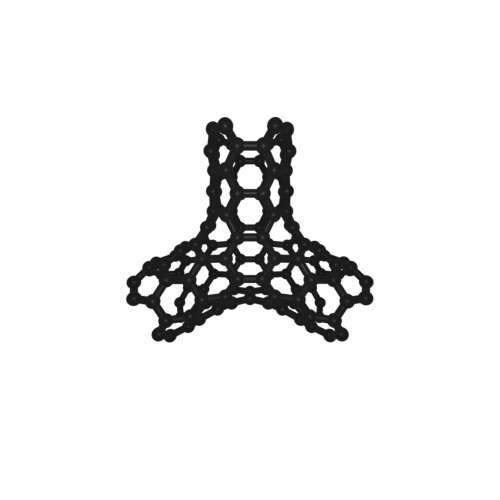

In [44]:
Image("angstrom.png")

In [ ]:
# Align to y axis
# y_align = [41, 683]
# c1, c2 = (mol.coordinates[y] for y in y_align)
# mol.align(c2 - c1, [0, 1, 0])

# Align to x axis
x_align = [11, 48]
c1, c2 = (mol.coordinates[x] for x in x_align)
mol.align(c2 - c1, [1, 0, 0])

# Rotate slightly to align properly
mol.center([0, 0, 0])
mol.rotate(([0, 0, 0], [0, 1, 0]), np.deg2rad(8))
mol.center([0, 0, 0])

# Save
mol.write("tetra-align.xyz")

In [28]:
render(mol, renderer=blend)

Rendering Trigonal-Planar-n4-m4 image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/angstrom


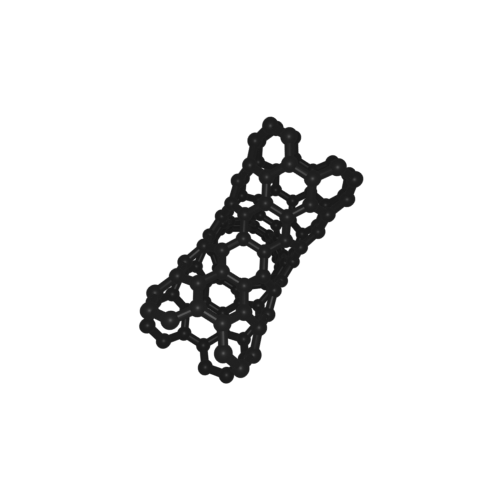

In [29]:
Image("angstrom.png")

In [4]:
traj = Trajectory(molecule=mol)
for a in range(40):
    mol.rotate('z', np.pi / 4)
    traj.append(mol)

In [8]:
list(range(0,10,1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [16]:
start, stop, step = 2, 10, 1 

In [18]:
list(range(start + step, stop, step))

[3, 4, 5, 6, 7, 8, 9]

In [12]:

traj2 = Trajectory(molecule=traj[start])
for i in range(start, stop, step):
    traj2.append(traj[i])

AttributeError: 'list' object has no attribute 'shape'

In [7]:
traj[2:5:1.2]

2 5 1.2


In [5]:
render(traj, renderer=blend)

Rendering 5 images with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/0.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/1.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/2.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/3.png
Rendering Molecule image with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/4.png
Rendering tetra-align video with Blender -> /Users/kbsezginel/kbs/git/lemongrove.github.io/assets/doc/hexagonal/angstrom


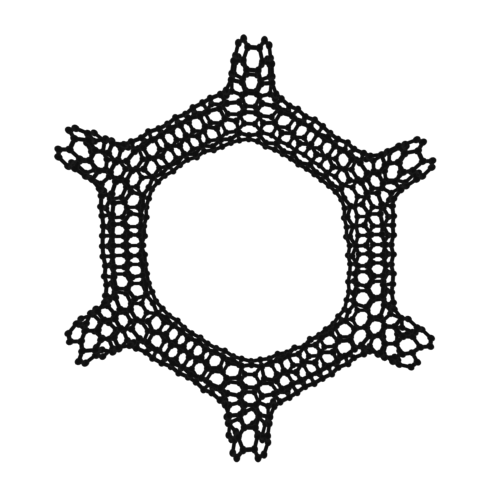

In [10]:
Image("rotate.png")